<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,288.322479,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,288.399200,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,281.878265,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,274.033997,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,268.433563,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


Visualizing Closing Price

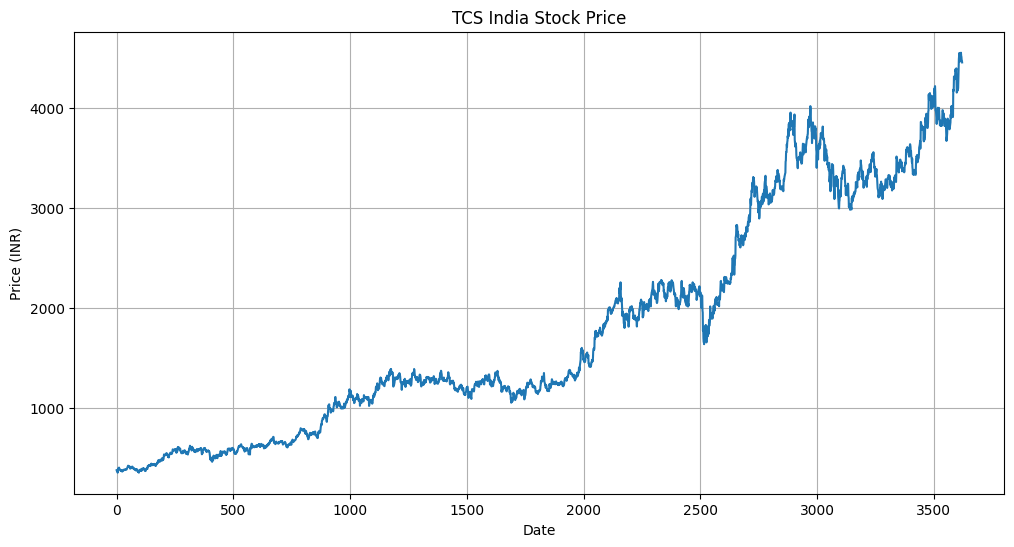

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3617,4576.000000,4588.000000,4512.000000,4521.049805,1216500
3618,4521.049805,4555.899902,4495.899902,4512.350098,1717263
3619,4476.950195,4487.000000,4436.700195,4479.250000,1265505
3620,4481.000000,4499.000000,4454.149902,4475.950195,1688793


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3617,4042.496487
3618,4047.827488
3619,4052.894487
3620,4058.188489


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

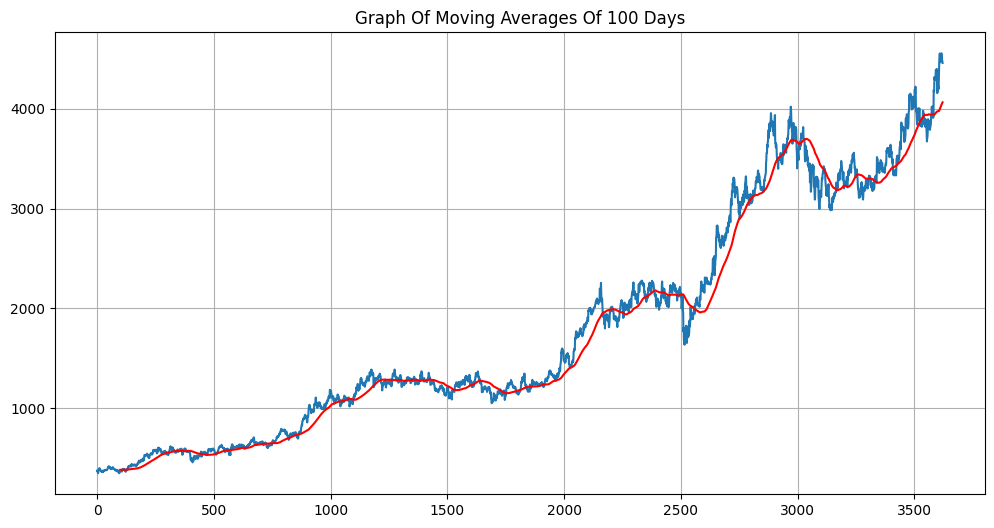

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3617,3936.912750
3618,3942.622251
3619,3948.110751
3620,3953.753252


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

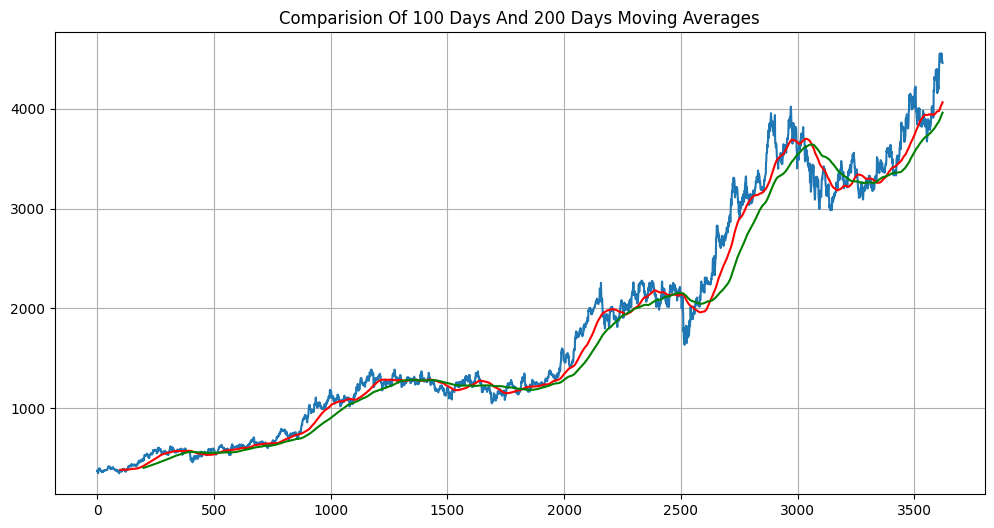

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3622, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2535, 7)
(1087, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,288.322479,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,288.399200,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,281.878265,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,274.033997,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,268.433563,6048178


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2535,2020-04-21,1765.000000,1794.599976,1727.699951,1737.650024,1602.725830,5122541
2536,2020-04-22,1737.650024,1790.000000,1719.150024,1769.500000,1632.102783,3829836
2537,2020-04-23,1780.000000,1900.000000,1760.849976,1878.250000,1732.408691,5934366
2538,2020-04-24,1840.699951,1851.949951,1807.800049,1818.550049,1677.344116,2987102
2539,2020-04-27,1832.300049,1875.000000,1825.000000,1836.599976,1693.992310,3374741


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.70858459],
       [0.75533859],
       [0.76179551]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2435, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - loss: 0.0910 - mean_absolute_error: 0.2196
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - loss: 0.0081 - mean_absolute_error: 0.0628
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0080 - mean_absolute_error: 0.0604
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0097 - mean_absolute_error: 0.0692
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0088 - mean_absolute_error: 0.0648
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0066 - mean_absolute_error: 0.0577
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0053 - mean_absolute_error: 0.0500
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0053 - mean_absolute_error: 0.0504
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0049 - mean_absolute_error: 0.0485
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0055 - mean_absolute_error: 0.0515
Epoch 11/100
77/77 ━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1087, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2071.699951
1,2081.500000
2,2046.650024
3,2054.300049
4,2077.350098


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14922533],
       [0.1525845 ],
       [0.14063894],
       ...,
       [0.97446356],
       [0.97333249],
       [0.96675122]])

In [ ]:
input_data.shape

(1187, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1087, 100, 1)
(1087,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [ ]:
y_pred.shape

(1087, 1)

In [ ]:
y_test

array([0.03472271, 0.04563996, 0.0829163 , ..., 0.97446356, 0.97333249,
       0.96675122])

In [ ]:
y_pred

array([[0.10548326],
       [0.10552415],
       [0.10571092],
       ...,
       [0.9676711 ],
       [0.96811193],
       [0.9676864 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00034277])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

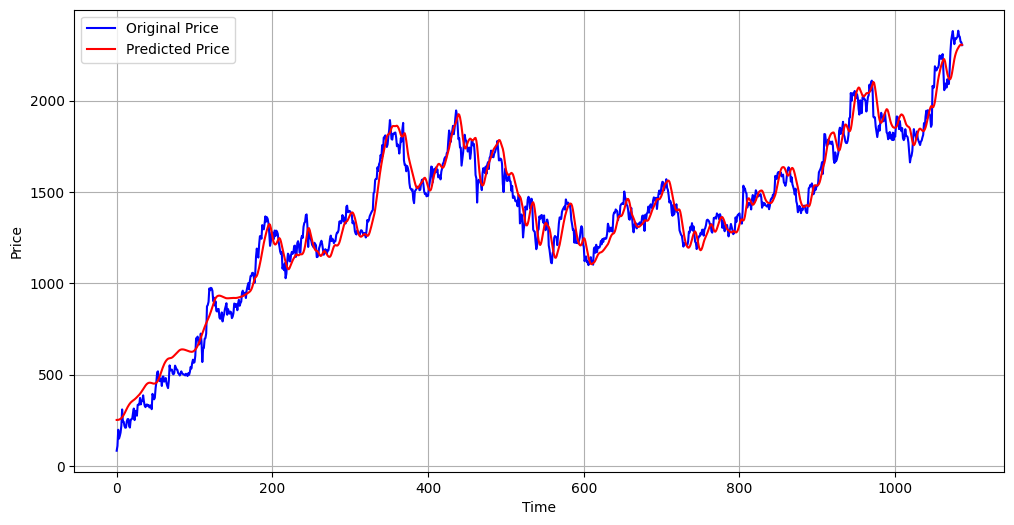

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.57%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9694576712362566


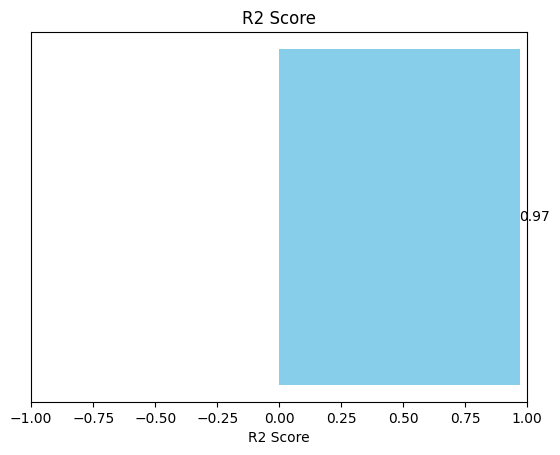

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

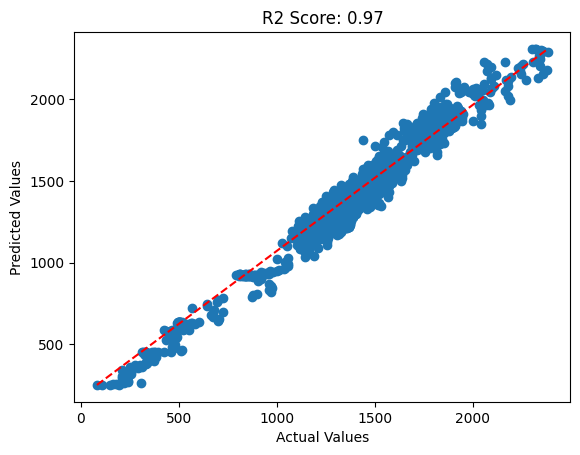

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()